# Home Assignment - Sleep Related Brain Activity 

- **Student**: Emma van den Brink
- **Course code**: M_PROPSY
- **Course Coordinator**: Matthias Nau
- **Teaching Assistent**: Anna van Harmelen
- **Date**: 8-11-2024
- **Link**: https://neurosynth.org/analyses/terms/sleep/ 

    - The files *Sleep: Uniformity test* and *Anatomical* were used from **Neurosynth**

This is a Home Assignment for the course Programming For Psychologists at the Vrije Univesiteit Amsterdam during the period sep-dec. This project uses MRI data from Neurosynth to visualize and interpret brain activity during sleep. This project layers functional data onto anatomical brain structures to create a statistical brain map and generates a histogram of the voxel intensity to analyze the distribution of brain acitivity during sleep.

## Search for MRI files:

In order to create a figure, relevant data files need to be retrieved from a specific directory. Only files with certain extensions are needed for the figure, where the focus lies on *.nii files. An empty list will store the relevant MRI_files. The code will then search the directory and subdirectories, adding files with the correct extensions to the list. 

In [ ]:
import os
import glob

# Directory to search for MRI files
# Extensions to look for
directory = '/Users/ecvandenbrink/Desktop/VU docs/RMCNP/Programming/Home Assignment'
extensions = ['*.nii']

#search for the MRI files in the directory and its subdirectories
mri_files = [
    file
    for ext in extensions
    for file in glob.glob(os.path.join(directory, '**', ext), recursive=True)
]

## Plotting the statistical brain map:

To visualize brain activity during sleep, the plot_stat_function will be used. First we assign both the anatomical and functional files. Then we check if the files are present in the MRI_files, and based on the keywords they will be assigned to either file. When the files are not present, an error will occur. When the files are assigned, the images will be loaded. The anatomical image serves as the background and the functional image as the statistical map. Additional visual features are added to better visualze the figure. Last of all the optimal cut coordinates are calculated, to focus on the most relevant brain regions. 

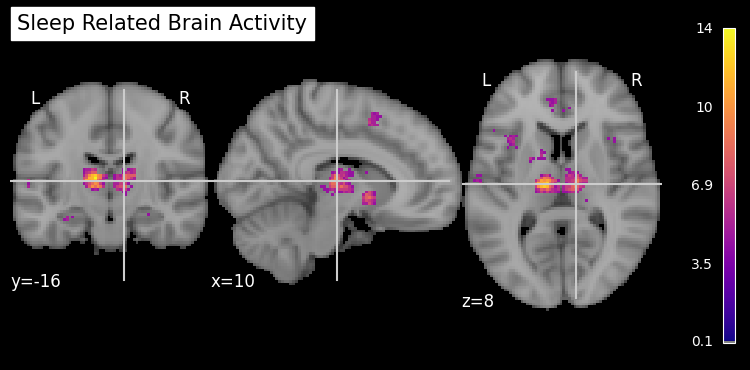

In [2]:
import os
import glob
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img
from nilearn.plotting import find_xyz_cut_coords

# Directory to search for MRI files
# Extensions to look for
directory = '/Users/ecvandenbrink/Desktop/VU docs/RMCNP/Programming/Home Assignment'
extensions = ['*.nii']

#search for the MRI files in the directory and its subdirectories
mri_files = [
    file
    for ext in extensions
    for file in glob.glob(os.path.join(directory, '**', ext), recursive=True)
]

#assign anatomical and functional files based on keywords
file_map = {key: None for key in ['anatomical', 'functional']}
for file in mri_files:
    if "anatomical" in file.lower():
        file_map['anatomical'] = file
    elif "sleep_uniformity" in file.lower():
        file_map['functional'] = file

#assign the files to variables
anatomical_file = file_map['anatomical']
functional_file = file_map['functional']

#check if the files are present, raise an error if this is not the case
if None in file_map.values():
    raise FileNotFoundError(f"Missing required files: {', '.join(key for key, path in file_map.items() if path is None)}")

# Load the anatomical and functional images
anatomical_img = load_img(file_map['anatomical']) #background
functional_img = load_img(file_map['functional']) #statistical map

#find the optimal cut coordinates from the functional image
cut_coords = find_xyz_cut_coords(functional_img)

#visualize the images using plot_stat_map
plot_stat_map(
    stat_map_img=functional_img,                
    bg_img=anatomical_img,                      
    threshold=0.1,                              # Set voxel threshold
    title= "Sleep Related Brain Activity",      
    cmap='plasma',                              # Colormap
    cut_coords=cut_coords,                      
    display_mode='ortho',                       
    draw_cross=True,                            # Draw cross at the cut coordinates
)

## Plotting the histogram:

Now we will plot a histogram of all the positive values of the functional data. First the functional image is loaded using nib.load() and assigned to the functional_img_nib. The image data will then be extracted using .get_fdata() storing the data in functional_data. Only the positive values will be used and plotted in the histogram. Additionily visual features of the histogram are added. 

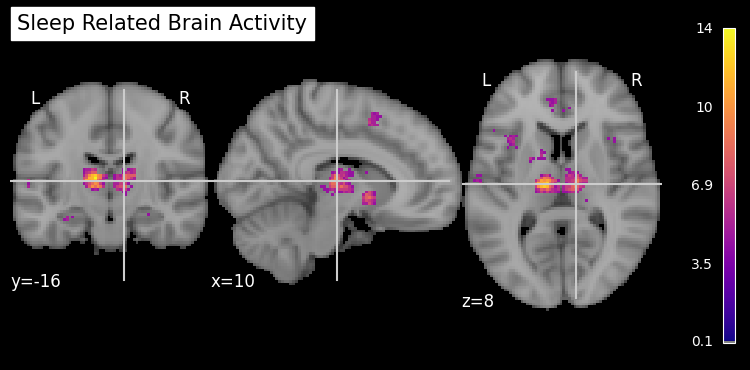

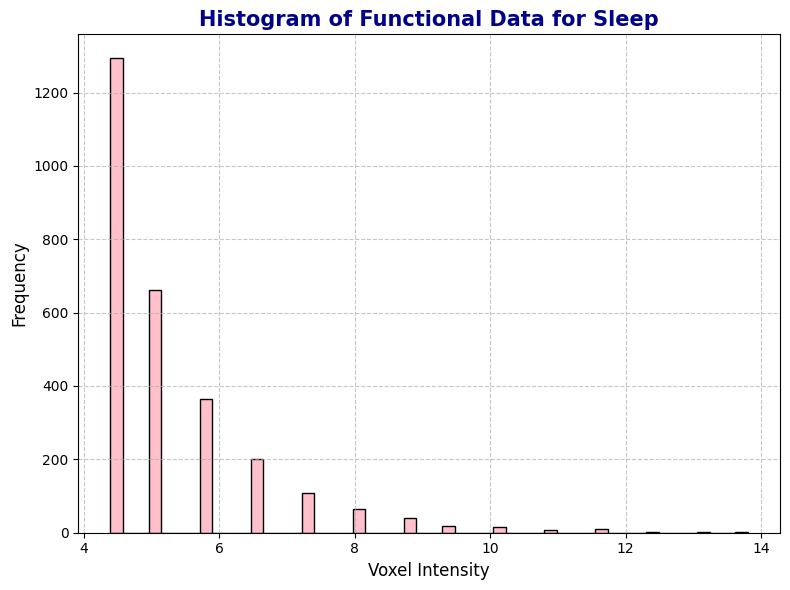

In [5]:
import os
import glob
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img
from nilearn.plotting import find_xyz_cut_coords
import matplotlib.pyplot as plt
import nibabel as nib

# Directory to search for MRI files
# Extensions to look for
directory = '/Users/ecvandenbrink/Desktop/VU docs/RMCNP/Programming/Home Assignment'
extensions = ['*.nii']

#search for the MRI files in the directory and its subdirectories
mri_files = [
    file
    for ext in extensions
    for file in glob.glob(os.path.join(directory, '**', ext), recursive=True)
]

#assign anatomical and functional files based on keywords
file_map = {key: None for key in ['anatomical', 'functional']}
for file in mri_files:
    if "anatomical" in file.lower():
        file_map['anatomical'] = file
    elif "sleep_uniformity" in file.lower():
        file_map['functional'] = file

#assign the files to variables
anatomical_file = file_map['anatomical']
functional_file = file_map['functional']

#check if the files are present, raise an error if this is not the case
if None in file_map.values():
    raise FileNotFoundError(f"Missing required files: {', '.join(key for key, path in file_map.items() if path is None)}")

# Load the anatomical and functional images
anatomical_img = load_img(file_map['anatomical']) #background
functional_img = load_img(file_map['functional']) #statistical map

#find the optimal cut coordinates from the functional image
cut_coords = find_xyz_cut_coords(functional_img)

#visualize the images using plot_stat_map
plot_stat_map(
    stat_map_img=functional_img,                
    bg_img=anatomical_img,                      
    threshold=0.1,                              # Set voxel threshold
    title= "Sleep Related Brain Activity",      
    cmap='plasma',                              # Colormap
    cut_coords=cut_coords,                      
    display_mode='ortho',                       
    draw_cross=True,                            # Draw cross at the cut coordinates
)

# Load functional image data
functional_data = nib.load(functional_file).get_fdata()

# Extract positive values from the functional data
positive_values = functional_data[functional_data > 0] 

#plot histogram of positive values
plt.figure(figsize=(8, 6)) 
plt.hist(positive_values, bins=50, color='pink', edgecolor='black') 
plt.title('Histogram of Functional Data for Sleep', fontsize = 15, fontweight = 'bold', color = 'darkblue') 
plt.xlabel('Voxel Intensity', fontsize = 12) 
plt.ylabel('Frequency', fontsize = 12) 
plt.grid(True, linestyle='--', alpha=0.7) # Add gridlines
plt.tight_layout()
plt.show() 

## Results:

The first image shows brain regions that are active during sleep. The second image shows a histogram of the positve values concerncing the functional data. The histogram shows the voxel intensity (activity of brain regions) and their frequency. Showing that only specific brain regions are active during sleep with most brain areas remaining inactive, as the voxel intensity decreases with the frequency. More voxel intensity means activity of the brain regions. 

# Thank you!

Please let me know if you have any follow-up questions or suggestions